# Task 3 - Synthesis and Recommendations

Finally, we will discuss the performances of both models, what sort of errors they both made and finally recommendations for future development. 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load df from my_dataframe.csv
train_df = pd.read_csv('train_dataframe.csv', index_col=0)
val_df = pd.read_csv('val_dataframe.csv', index_col=0)

# load this: report_df.to_csv('task1_classification_report.csv', index=True)
report_1_df = pd.read_csv('task1_classification_report.csv', index_col=0)
report_2_df = pd.read_csv('task2_classification_report.csv', index_col=0)

# round both reports to integer
report_1_df = report_1_df.round(2)
report_2_df = report_2_df.round(2)

misclassified_images_1 = pd.read_csv('misclassified_images_1.csv')
misclassified_images_2 = pd.read_csv('misclassified_images_2.csv')

In [36]:
print("classification report model 1: \n", report_1_df) 
print("\n classification report model 2: \n", report_2_df)

classification report model 1: 
               precision  recall  f1-score  support
crazing            0.91    0.85      0.88     60.0
inclusion          0.82    0.97      0.89     60.0
patches            0.85    0.92      0.88     60.0
pitted             0.88    0.77      0.82     60.0
rolled-in          1.00    1.00      1.00     60.0
scratches          0.95    0.88      0.91     60.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.90    0.90      0.90    360.0
weighted avg       0.90    0.90      0.90    360.0

 classification report model 2: 
               precision  recall  f1-score  support
crazing            1.00    1.00      1.00    60.00
inclusion          0.95    1.00      0.98    60.00
patches            1.00    1.00      1.00    60.00
pitted             1.00    1.00      1.00    60.00
rolled-in          1.00    1.00      1.00    60.00
scratches          1.00    0.95      0.97    60.00
accuracy           0.99    0.99      0.99     0.99
macro avg     

## Comparative Analysis
The model from task 2, which combines the pre-trained ResNet18 model with a Random Forest classifier performs significantly better at recognising all defects than the model combining HOG and GLCM feature extraction with a RF classifier designed in task 1. The average precision for the model from task 2 is 0.99, while the precision for the model from task 1 is 0.90.

One reason is the types of features extracted by the ResNet18 model. The model consists of multiple convolutional layers, which allows the extraction of hierarchical and multi-scale features such as fine textures, local shapes, and repeated patterns. The model designed in task 1, on the other hand, makes use of only two distinct feature types, HOG and GLCM, which primarily capture edges, gradients, and simple textural statistics, limiting the ability of the classifier to distinguish more subtle or complex defects.

The ResNet18 model has been trained on a large dataset, ImageNet, which contains over 1.2 million images across 1,000 classes. This exposure allows the model to learn a wide variety of visual patterns, from simple edges to complex textures and object structures. As a result, even when applied to grayscale steel surface images, the model can extract rich and generalizable features that help the Random Forest classifier distinguish between different types of defects more effectively than handcrafted features alone.

I would also like to note that the RF classifier in task 1 is trained using 18,512 input features, while the RF classifier in task 2 is trained using only 512 input features. The fact that model 2 achieves higher precision demonstrates how curated and informative the ResNet-derived features are, with the ResNet part of the model effectively performing high-level preprocessing before classification.

## Error Analysis

First, for model 1 I have picked the following 3 images:

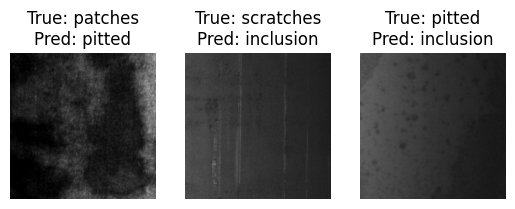

In [22]:
# for each misclassified image, plot the image, the true label and the predicted label which is type and predicted_type
for i, row in misclassified_images_1.iterrows():
    img = Image.open(row["filepath"]).convert("RGB")
    plt.subplot(1, len(misclassified_images_2), i + 1)
    plt.imshow(img)
    plt.title(f"True: {row['type']}\nPred: {row['predicted_type']}")
    plt.axis('off')
plt.show()

which all depict different 'problems' regarding the model. 
1) Patches which are classified as a pitted-surface. This mistake can be due to the stepsize used to collect the GLCM features, where the largest stepsize of 8 might not provide enough distance to properly contextualise these features.
2) Scratches classified as inclusions. This is a classification error which is hard to spot by eye as well, and we will see model 2 equally struggles with this. This is most likely due to both defects consisting of straight, high contrast lines. 
3) A pitted-surface clasified as an inclusion. This misclassification can reasonably be due to the image low image quality, with a general gradient between the upper left corner and lower right corner. The HOG feature might have picked up a gradient line, which can easily be classified as an inclusion. 

For the model from task 2, there are only 3 mistakes in classification. For each image, a scratch is classified as an inclusion. 

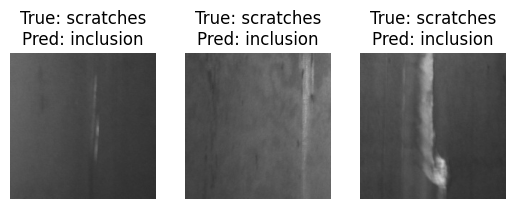

In [ ]:
# for each misclassified image, plot the image, the true label and the predicted label which is type and predicted_type
for i, row in misclassified_images_2.iterrows():
    img = Image.open(row["filepath"]).convert("RGB")
    plt.subplot(1, len(misclassified_images_2), i + 1)
    plt.imshow(img)
    plt.title(f"True: {row['type']}\nPred: {row['predicted_type']}")
    plt.axis('off')
plt.show()


To visualise the difference between images showing scratches and images showing inclusions, we can display 10 images from the dataset

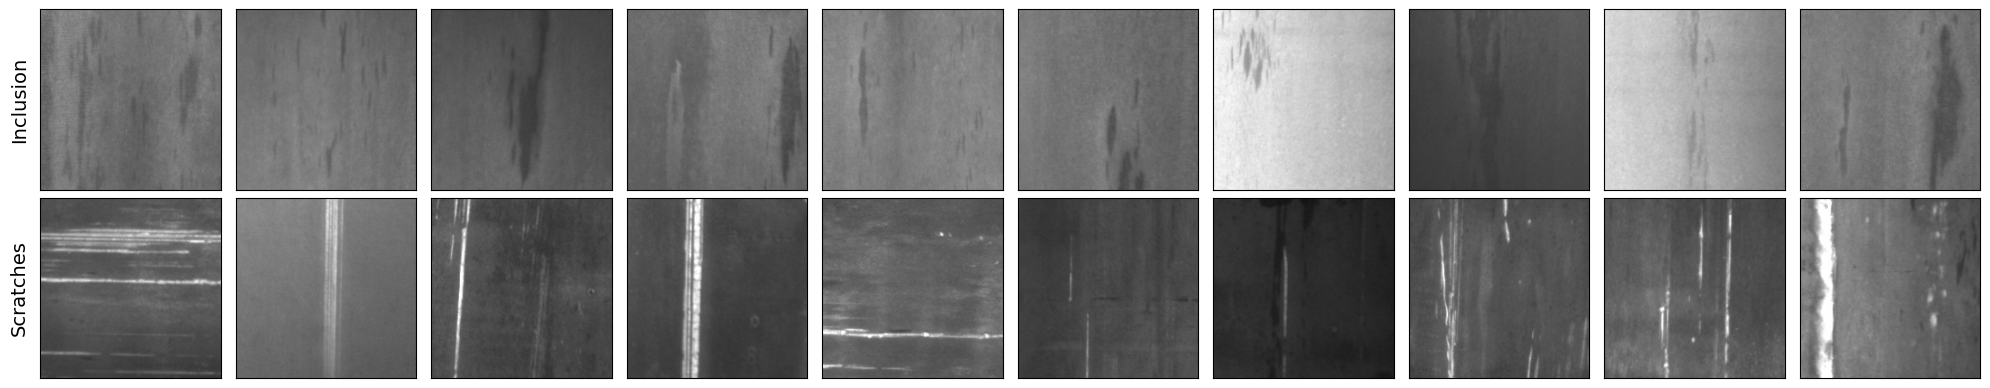

In [23]:
import matplotlib.pyplot as plt
from PIL import Image

# Get 10 inclusions and 10 scratches from val_df
inclusion_images = val_df[val_df["type"] == "inclusion"].head(10)
scratch_images = val_df[val_df["type"] == "scratches"].head(10)

all_images = [inclusion_images, scratch_images]
all_labels = ["Inclusion", "Scratches"]

# Create figure (from matplotlib documentation)
fig, axs = plt.subplots(2, 10, figsize=(20, 4))

for row_idx, (images, label) in enumerate(zip(all_images, all_labels)):
    for col_idx, filepath in enumerate(images["filepath"]):
        img = Image.open(filepath)
        axs[row_idx, col_idx].imshow(img, cmap='gray')
        # Hide ticks but keep label
        axs[row_idx, col_idx].set_xticks([])
        axs[row_idx, col_idx].set_yticks([])

    # Set vertical row label on leftmost subplot
    axs[row_idx, 0].set_ylabel(label, fontsize=14, rotation=90, labelpad=15, va='center')

plt.tight_layout()
plt.show()

Again, we can see both defects can be seen by long streaks in a relatively straight line. It is highly likely the ResNet model, which consists of multiple convolution layers, recognises some of these features as similar. 

One thing interesting to note, is how in this subset of the data inclusions seem to have a darker colour than the surroundings, while scratches appear lighter. This can be used for a further experiment to try and distinguish the 2 types of defects.

## Future Strategy & Next Steps:

The first experiment I would recommend with GPU access, is to append a new classification layer to the ResNet18 model which we can train using our own data. This is a tried and tested method (as done [here](https://medium.com/@imabhi1216/fine-tuning-a-pre-trained-resnet-18-model-for-image-classification-on-custom-dataset-with-pytorch-02df12e83c2c#bcd2))

Next, I would also add a 7th class to the dataset which consists of images without a defect. The current model can classify the type of defect, but ideally you want a camera to pick up on a defect automaticlly and classify the type of defect. If we do not have access to the camera (which is the case in this scenario) we can use parts of the surfaces next to scratches, where the subimages can be extrapolated to the correct dimensions for the model.  

Finally, using the PyTorch library we can easily choose from a [range of models](https://docs.pytorch.org/vision/stable/models.html#torchvision.models.resnet18) to use for this application. Other models might have been trained on a dataset more closely related to the NEU-DET dataset. 



